In [5]:
import pandas as pd

trainLabels = pd.read_csv("trainLabels.csv")
trainLabels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import sys
import cv2
%matplotlib inline

In [52]:
base_image_dir = os.path.join('train/')
df = pd.read_csv(os.path.join('trainLabels.csv'))
df['path'] = df['image'].map(lambda x: os.path.join(base_image_dir,'{}.jpeg'.format(x)))
df['exists'] = df['path'].map(os.path.exists) #Most of the files do not exist because this is a sample of the original dataset
df = df[df['exists']]
df = df.drop(columns=['image','exists'])
df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe
df.head(10)

,level,path
0,0,train/17356_right.jpeg
1,0,train/14305_right.jpeg
2,2,train/21703_right.jpeg
3,0,train/29917_left.jpeg
4,2,train/26760_right.jpeg
5,0,train/6586_right.jpeg
6,2,train/41675_right.jpeg
7,0,train/15268_left.jpeg
8,0,train/12010_right.jpeg
9,0,train/13730_right.jpeg


In [53]:
df0=df.loc[df["level"]==0].sample(n=2000)
df1=df.loc[df["level"]==1].sample(n=2000)
df2=df.loc[df["level"]==2].sample(n=2000)
df3=df.loc[df["level"]==3].sample(n=2000,replace=True)
df4=df.loc[df["level"]==4].sample(n=2000,replace=True)
df1=df1.append([df0,df2,df3,df4]).reset_index(drop=True)

In [54]:
df_upsample = df1.sample(frac=1).reset_index(drop=True)

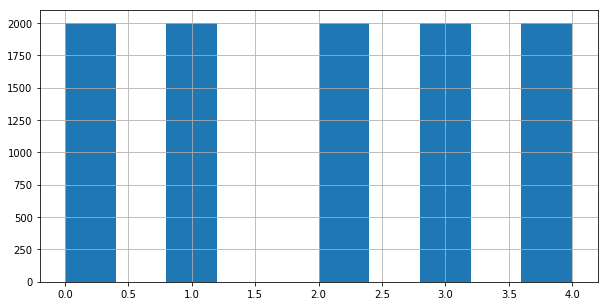

In [55]:
df_upsample['level'].hist(figsize = (10, 5))

In [56]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_upsample,test_size=0.2)

In [57]:
from PIL import Image

im = Image.open(train_df['path'][1])
width, height = im.size
print(width,height) 

4752 3168


In [19]:
! pip install fastai

    100% |████████████████████████████████| 3.5MB 11.6MB/s ta 0:00:01
    100% |████████████████████████████████| 773.1MB 62kB/s  eta 0:00:01    42% |█████████████▋                  | 330.2MB 64.6MB/s eta 0:00:07
    100% |████████████████████████████████| 10.3MB 5.5MB/s eta 0:00:01
    100% |████████████████████████████████| 10.1MB 8.0MB/s eta 0:00:01
    100% |████████████████████████████████| 3.7MB 16.5MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 43.0MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 41.1MB/s ta 0:00:01
    100% |████████████████████████████████| 2.2MB 22.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/05/f2/764a5d530cf143ded9bc95216edb6e258c6554511e78de7c250557e8f3ed/tqdm-4.37.0-py2.py3-none-any.whl


  Running setup.py bdist_wheel for fastai ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/45/3e/33/2286dfb90e4d3e197356552c0743678bb158d47f6e05540029
  Running setup.py bdist_wheel for nvidia-ml-py3 ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
Successfully built fastai nvidia-ml-py3
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
from fastai import *
from fastai.vision import *

In [21]:
print('Make sure cuda is installed:', torch.cuda.is_available())
print('Make sure cudnn is enabled:', torch.backends.cudnn.enabled)

Make sure cuda is installed: True
Make sure cudnn is enabled: True


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
bs = 16 #smaller batch size is better for training, but may take longer
sz=224

In [59]:
df1

,level,path
0,1,train/41318_right.jpeg
1,1,train/23538_right.jpeg
2,1,train/41851_left.jpeg
3,1,train/22987_right.jpeg
4,1,train/227_left.jpeg
5,1,train/39864_right.jpeg
6,1,train/14371_right.jpeg
7,1,train/26470_left.jpeg
8,1,train/31863_left.jpeg
9,1,train/27810_right.jpeg


In [63]:
tfms = get_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,max_zoom=1.1,max_lighting=0.1,p_lighting=0.5)
src = (ImageList.from_df(df=df_upsample,path='./',cols='path') #get dataset from dataset
        .split_by_idx(range(len(train_df)-1,len(df1))) #Splitting the dataset
        .label_from_df(cols='level') #obtain labels from the level column
      )
data_upsample= (src.transform(tfms,size=sz) #Data augmentation
        .databunch(bs=bs,num_workers=0) #DataBunch
        .normalize(imagenet_stats) #Normalize
)

In [30]:
use_cuda=True

In [ ]:
from sklearn.metrics import cohen_kappa_score
def quadratic_kappa(y_hat, y):
    return torch.tensor(cohen_kappa_score(torch.argmax(y_hat,1), y, weights='quadratic'),device='cuda:0')

In [65]:
f_score = partial(fbeta, thresh=0.2, beta = 1)
learn_upsample_resnet = create_cnn(data_upsample, models.resnet34, metrics = [accuracy,quadratic_kappa])

In [64]:
data_upsample

ImageDataBunch;

Train: LabelList (7999 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,2,0,0,0
Path: .;

Valid: LabelList (2001 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,4,1,4,2
Path: .;

Test: None

In [66]:
learn_upsample_resnet.fit_one_cycle(4,max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time
0,1.883402,1.519968,0.438281,0.595003,57:59
1,1.388045,1.207343,0.464268,nan,57:38
2,1.250627,1.109461,0.500750,0.693793,57:30
3,1.232808,1.082618,0.512244,0.693204,57:36


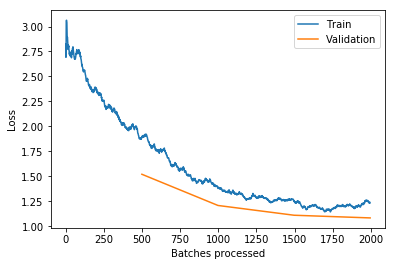

In [68]:
learn_upsample_resnet.recorder.plot_losses()

In [70]:
interp = ClassificationInterpretation.from_learner(learn_upsample_resnet)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

False

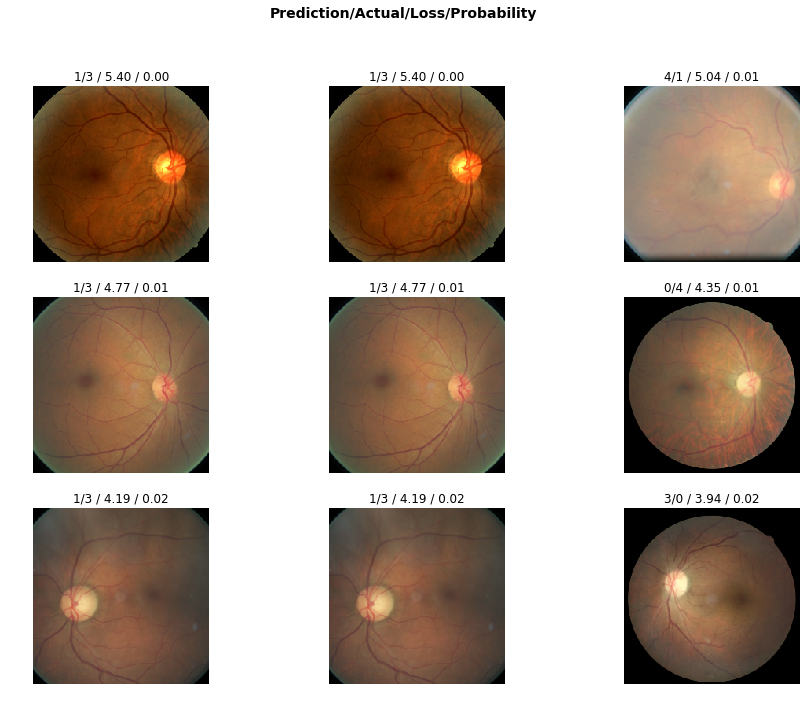

In [71]:
interp.plot_top_losses(9, figsize=(15,11))

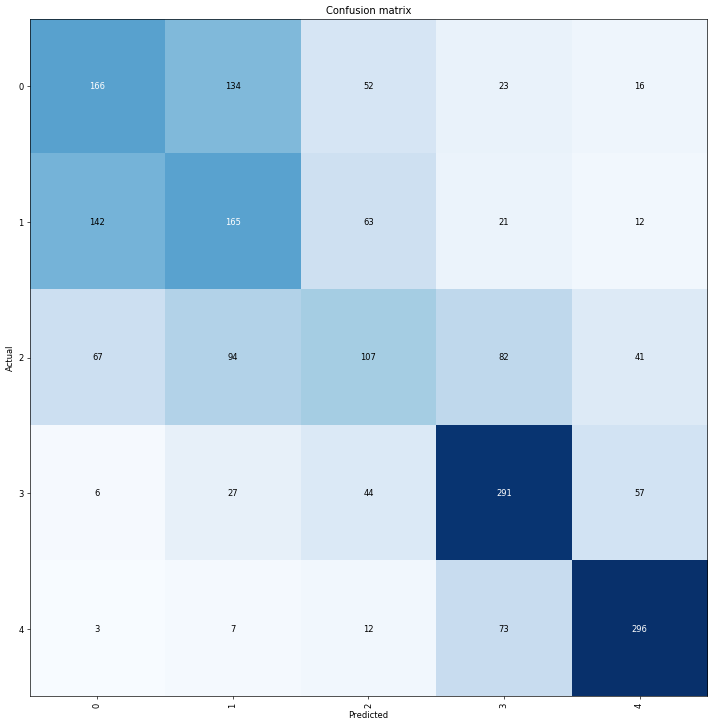

In [72]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)